<a href="https://colab.research.google.com/github/FreddieSethi/Multi-Class-Image-Classification/blob/main/Multi-Class-Image-Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Upload dataset

## Mount google drive

This will mount the google drive for google colab and you will be able access contents of your drive.

In [ ]:
import tensorflow as tf
import numpy as np
import math
import timeit
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import cv2
import pandas as pd
%matplotlib inlineimport numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation, BatchNormalization
from keras import regularizers
from keras.optimizers import RMSprop, Adadelta, Adam, Adamax, Nadam
from keras.callbacks import Callback
from keras import backend as K
from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np
from keras.utils import np_utils

UsageError: unrecognized arguments: numpy as np


In [ ]:
from keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
#from resnets_utils import *
from keras.initializers import glorot_uniform
import scipy.misc
from tensorflow.python.framework import ops
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
%matplotlib inline

import keras.backend as K
K.set_image_data_format('channels_last')
K.set_learning_phase(1)


## Loading dataset

First, we load the CIFAR-10 dataset. This might take a few minutes to download the first time you run it, but after that the files should be cached on disk and loading should be faster.

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another.

Let's normalize our training and test data.

Then, Reshaping training set, as we need to specify number of channels (one for grayscale images and three for RGB). Since, these are grayscale images so we will specify channel as 1.

In [ ]:

def load_cifar10(num_training=50000, num_test=10000):
    """
    Fetch the CIFAR-10 dataset from the web.
    """
    # Load the raw CIFAR-10 dataset and use appropriate data types and shapes
    cifar10 = tf.keras.datasets.cifar10.load_data()
    (X_train, y_train), (X_test, y_test) = cifar10
    X_train = np.asarray(X_train, dtype=np.float32)
    y_train = np.asarray(y_train, dtype=np.int32).flatten()
    X_test = np.asarray(X_test, dtype=np.float32)
    y_test = np.asarray(y_test, dtype=np.int32).flatten()


    # Normalize the data: subtract the mean pixel and divide by std
    mean_pixel = X_train.mean(axis=(0, 1, 2), keepdims=True)
    std_pixel = X_train.std(axis=(0, 1, 2), keepdims=True)
    X_train = (X_train - mean_pixel) / std_pixel
    X_test = (X_test - mean_pixel) / std_pixel

    return X_train, y_train, X_test, y_test


# Invoke the above function to get our data.
X_train, y_train, X_test, y_test = load_cifar10()
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape, y_train.dtype)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

170498071/170498071 [==============================] - 2s 0us/step
number of training examples = 50000
number of test examples = 10000
Train data shape:  (50000, 32, 32, 3)
Train labels shape:  (50000,) int32
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


# Data Exploration



Till now, you have built a fully-connected network for all image datasets. But here, it is more natural to apply a ConvNet to it.
To get started, let's examine the shapes of your data.

In [ ]:
# Plotting helper function
def plot_10_by_10_images(images):

    # figure size
    fig = plt.figure(figsize=(10,10))

    # plot image grid
    for x in range(10):
        for y in range(10):
            ax = fig.add_subplot(10, 10, 10*y+x+1)
            plt.imshow(images[10*y+x])
            plt.xticks(np.array([]))
            plt.yticks(np.array([]))
    plt.show()

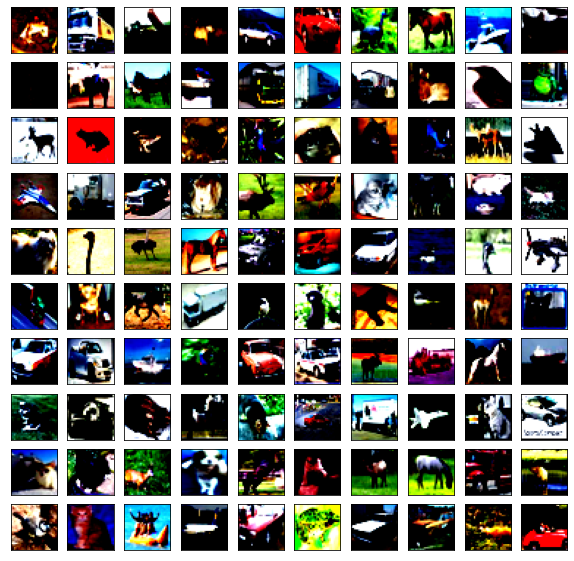

In [ ]:
# Explore Cifar10 dataset
plot_10_by_10_images(X_train[:100])

y = 8


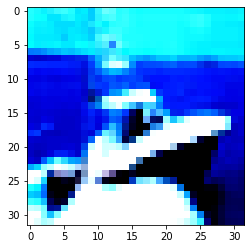

In [ ]:
# Example of a picture
index = 8
plt.imshow(X_train[index])
print ("y = " + str(np.squeeze(y_train[index])))

# Base CNN

In [ ]:
from warnings import filters
# define the model architecture
model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation="relu", input_shape=[32,32,3]),
    tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation="relu"),
    #add another layer
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),

])


# Compile your model
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# training the network
history = model.fit(X_train, y_train, epochs=25, batch_size=32)

# accuracy
test_loss, test_accuracy = model.evaluate(X_test.reshape(-1,32,32,3), y_test, batch_size=128, verbose=2)
print('Accuracy on test dataset:', test_accuracy)

Epoch 1/25
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2364 - accuracy: 0.5558
Epoch 2/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7976 - accuracy: 0.7201
Epoch 3/25
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6279 - accuracy: 0.7790
Epoch 4/25
1563/1563 [==============================] - 7s 4ms/step - loss: 0.4982 - accuracy: 0.8261
Epoch 5/25
1563/1563 [==============================] - 7s 4ms/step - loss: 0.3901 - accuracy: 0.8630
Epoch 6/25
1563/1563 [==============================] - 7s 4ms/step - loss: 0.2981 - accuracy: 0.8953
Epoch 7/25
1563/1563 [==============================] - 7s 4ms/step - loss: 0.2329 - accuracy: 0.9176
Epoch 8/25
1563/1563 [==============================] - 7s 4ms/step - loss: 0.1884 - accuracy: 0.9338
Epoch 9/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.1579 - accuracy: 0.9443
Epoch 10/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.146

# Experiment 1

LR is has been tested in powers of 10 between 0-1. This is a common hyperparameter to be changed to improve accuracy. LR has had a significant impact on the accuracy, due to lower LR's, making smaller updates to the weight, increases accruacy and only downside being training time.

## Learning rate = 0.0001

In [ ]:
from warnings import filters
# define the model architecture
model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation="relu", input_shape=[32,32,3]),
    tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])

# sets learning rate to 0.01, hence finding optimal leanring rate - experimenmt 1
optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.0001
)

# Compile your model
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

# training the network
history = model.fit(X_train, y_train, epochs=25, batch_size=32)

# accuracy
test_loss, test_accuracy = model.evaluate(X_test.reshape(-1,32,32,3), y_test, batch_size=128, verbose=2)
print('Accuracy on test dataset:', test_accuracy)

Epoch 1/25
1563/1563 [==============================] - 21s 7ms/step - loss: 1.5214 - accuracy: 0.4574
Epoch 2/25
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1708 - accuracy: 0.5890
Epoch 3/25
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0126 - accuracy: 0.6475
Epoch 4/25
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9085 - accuracy: 0.6848
Epoch 5/25
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8260 - accuracy: 0.7135
Epoch 6/25
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7585 - accuracy: 0.7388
Epoch 7/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.6920 - accuracy: 0.7620
Epoch 8/25
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6299 - accuracy: 0.7848
Epoch 9/25
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5737 - accuracy: 0.8040
Epoch 10/25
1563/1563 [==============================] - 7s 4ms/step - loss: 0.52

## Learing rate = 0.001

In [ ]:
from warnings import filters
# define the model architecture
model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation="relu", input_shape=[32,32,3]),
    tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])

# sets learning rate to 0.01, hence finding optimal leanring rate - experimenmt 1
optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.001
)

# Compile your model
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

# training the network
history = model.fit(X_train, y_train, epochs=25, batch_size=32)

# accuracy
test_loss, test_accuracy = model.evaluate(X_test.reshape(-1,32,32,3), y_test, batch_size=128, verbose=2)
print('Accuracy on test dataset:', test_accuracy)

Epoch 1/25
1563/1563 [==============================] - 9s 5ms/step - loss: 1.2195 - accuracy: 0.5650
Epoch 2/25
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7767 - accuracy: 0.7271
Epoch 3/25
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6046 - accuracy: 0.7891
Epoch 4/25
1563/1563 [==============================] - 9s 6ms/step - loss: 0.4713 - accuracy: 0.8336
Epoch 5/25
1563/1563 [==============================] - 9s 6ms/step - loss: 0.3618 - accuracy: 0.8708
Epoch 6/25
1563/1563 [==============================] - 9s 6ms/step - loss: 0.2796 - accuracy: 0.9000
Epoch 7/25
1563/1563 [==============================] - 8s 5ms/step - loss: 0.2110 - accuracy: 0.9245
Epoch 8/25
1563/1563 [==============================] - 9s 6ms/step - loss: 0.1811 - accuracy: 0.9361
Epoch 9/25
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1539 - accuracy: 0.9460
Epoch 10/25
1563/1563 [==============================] - 7s 4ms/step - loss: 0.136

## Learing rate = 0.01

In [ ]:
from warnings import filters
# define the model architecture
model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation="relu", input_shape=[32,32,3]),
    tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])

# sets learning rate to 0.01, hence finding optimal leanring rate - experimenmt 1
optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.01
)

# Compile your model
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

# training the network
history = model.fit(X_train, y_train, epochs=25, batch_size=32)

# accuracy
test_loss, test_accuracy = model.evaluate(X_test.reshape(-1,32,32,3), y_test, batch_size=128, verbose=2)
print('Accuracy on test dataset:', test_accuracy)

Epoch 1/25
1563/1563 [==============================] - 16s 5ms/step - loss: 2.3366 - accuracy: 0.1021
Epoch 2/25
1563/1563 [==============================] - 7s 5ms/step - loss: 2.3039 - accuracy: 0.0994
Epoch 3/25
1563/1563 [==============================] - 11s 7ms/step - loss: 2.3040 - accuracy: 0.0994
Epoch 4/25
1563/1563 [==============================] - 10s 6ms/step - loss: 2.3040 - accuracy: 0.0989
Epoch 5/25
1563/1563 [==============================] - 7s 5ms/step - loss: 2.3037 - accuracy: 0.1012
Epoch 6/25
1563/1563 [==============================] - 7s 5ms/step - loss: 2.3038 - accuracy: 0.0996
Epoch 7/25
1563/1563 [==============================] - 7s 5ms/step - loss: 2.3038 - accuracy: 0.1016
Epoch 8/25
1563/1563 [==============================] - 7s 5ms/step - loss: 2.3041 - accuracy: 0.0989
Epoch 9/25
1563/1563 [==============================] - 7s 4ms/step - loss: 2.3041 - accuracy: 0.0992
Epoch 10/25
1563/1563 [==============================] - 7s 5ms/step - loss: 2.

## Learing rate = 0.1

In [ ]:
from warnings import filters
# define the model architecture
model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation="relu", input_shape=[32,32,3]),
    tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])

# sets learning rate to 0.01, hence finding optimal leanring rate - experimenmt 1
optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.1
)

# Compile your model
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

# training the network
history = model.fit(X_train, y_train, epochs=25, batch_size=32)

# accuracy
test_loss, test_accuracy = model.evaluate(X_test.reshape(-1,32,32,3), y_test, batch_size=128, verbose=2)
print('Accuracy on test dataset:', test_accuracy)

Epoch 1/25
1563/1563 [==============================] - 8s 5ms/step - loss: 884.2568 - accuracy: 0.1004
Epoch 2/25
1563/1563 [==============================] - 7s 5ms/step - loss: 2.3156 - accuracy: 0.0992
Epoch 3/25
1563/1563 [==============================] - 7s 5ms/step - loss: 2.3151 - accuracy: 0.0989
Epoch 4/25
1563/1563 [==============================] - 8s 5ms/step - loss: 2.3165 - accuracy: 0.0992
Epoch 5/25
1563/1563 [==============================] - 7s 5ms/step - loss: 2.3163 - accuracy: 0.0988
Epoch 6/25
1563/1563 [==============================] - 7s 5ms/step - loss: 2.3157 - accuracy: 0.1010
Epoch 7/25
1563/1563 [==============================] - 7s 5ms/step - loss: 2.3158 - accuracy: 0.1006
Epoch 8/25
1563/1563 [==============================] - 7s 4ms/step - loss: 2.3172 - accuracy: 0.0994
Epoch 9/25
1563/1563 [==============================] - 7s 5ms/step - loss: 2.3147 - accuracy: 0.0993
Epoch 10/25
1563/1563 [==============================] - 7s 5ms/step - loss: 2.3

## Learing rate = 1

In [ ]:
from warnings import filters
# define the model architecture
model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation="relu", input_shape=[32,32,3]),
    tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])

# sets learning rate to 0.01, hence finding optimal leanring rate - experimenmt 1
optimizer = tf.keras.optimizers.Adam(
    learning_rate=1
)

# Compile your model
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

# training the network
history = model.fit(X_train, y_train, epochs=25, batch_size=32)

# accuracy
test_loss, test_accuracy = model.evaluate(X_test.reshape(-1,32,32,3), y_test, batch_size=128, verbose=2)
print('Accuracy on test dataset:', test_accuracy)

Epoch 1/25
1563/1563 [==============================] - 9s 6ms/step - loss: 228835792.0000 - accuracy: 0.0992
Epoch 2/25
1563/1563 [==============================] - 7s 5ms/step - loss: 2.4139 - accuracy: 0.1005
Epoch 3/25
1563/1563 [==============================] - 7s 5ms/step - loss: 2.4126 - accuracy: 0.0990
Epoch 4/25
1563/1563 [==============================] - 7s 5ms/step - loss: 2.4119 - accuracy: 0.0985
Epoch 5/25
1563/1563 [==============================] - 7s 5ms/step - loss: 2.4036 - accuracy: 0.1009
Epoch 6/25
1563/1563 [==============================] - 8s 5ms/step - loss: 2.4084 - accuracy: 0.0980
Epoch 7/25
1563/1563 [==============================] - 7s 5ms/step - loss: 2.4096 - accuracy: 0.1009
Epoch 8/25
1563/1563 [==============================] - 7s 5ms/step - loss: 2.4121 - accuracy: 0.0988
Epoch 9/25
1563/1563 [==============================] - 8s 5ms/step - loss: 2.4128 - accuracy: 0.1007
Epoch 10/25
1563/1563 [==============================] - 8s 5ms/step - los

# Experiment 2


## Filter size: 2x2

Filter size experiment has better results on the smaller filters, due to them identifying a smaller region of the image, hence detecting fine-grained patterns. However it can lead to overfitting, hence using dropout in later expoeriment to deal with this.

In [ ]:
from warnings import filters
# define the model architecture
model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(filters = 32, kernel_size = 2, padding = 'same', activation="relu", input_shape=[32,32,3]),
    tf.keras.layers.Conv2D(filters = 32, kernel_size = 2, padding = 'same', activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Conv2D(filters = 64, kernel_size = 2, padding = 'same', activation="relu"),
    tf.keras.layers.Conv2D(filters = 64, kernel_size = 2, padding = 'same', activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])

# Compile your model
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# training the network
history = model.fit(X_train, y_train, epochs=25, batch_size=32)


# accuracy
test_loss, test_accuracy = model.evaluate(X_test.reshape(-1,32,32,3), y_test, batch_size=128, verbose=2)
print('Accuracy on test dataset:', test_accuracy)



Epoch 1/25
1563/1563 [==============================] - 11s 6ms/step - loss: 1.2641 - accuracy: 0.5485
Epoch 2/25
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8749 - accuracy: 0.6916
Epoch 3/25
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7085 - accuracy: 0.7516
Epoch 4/25
1563/1563 [==============================] - 9s 6ms/step - loss: 0.5834 - accuracy: 0.7954
Epoch 5/25
1563/1563 [==============================] - 10s 6ms/step - loss: 0.4689 - accuracy: 0.8362
Epoch 6/25
1563/1563 [==============================] - 8s 5ms/step - loss: 0.3709 - accuracy: 0.8698
Epoch 7/25
1563/1563 [==============================] - 9s 6ms/step - loss: 0.2819 - accuracy: 0.9000
Epoch 8/25
1563/1563 [==============================] - 7s 4ms/step - loss: 0.2223 - accuracy: 0.9210
Epoch 9/25
1563/1563 [==============================] - 7s 4ms/step - loss: 0.1759 - accuracy: 0.9376
Epoch 10/25
1563/1563 [==============================] - 7s 4ms/step - loss: 0.1

## Filter Size: 3x3

In [ ]:
from warnings import filters
# define the model architecture
model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation="relu", input_shape=[32,32,3]),
    tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])

# Compile your model
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# training the network
history = model.fit(X_train, y_train, epochs=25, batch_size=32)


# accuracy
test_loss, test_accuracy = model.evaluate(X_test.reshape(-1,32,32,3), y_test, batch_size=128, verbose=2)
print('Accuracy on test dataset:', test_accuracy)



Epoch 1/25
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2281 - accuracy: 0.5609
Epoch 2/25
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7972 - accuracy: 0.7189
Epoch 3/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.6350 - accuracy: 0.7778
Epoch 4/25
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5161 - accuracy: 0.8200
Epoch 5/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.4119 - accuracy: 0.8561
Epoch 6/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.3213 - accuracy: 0.8864
Epoch 7/25
1563/1563 [==============================] - 7s 4ms/step - loss: 0.2417 - accuracy: 0.9144
Epoch 8/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.1966 - accuracy: 0.9297
Epoch 9/25
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1669 - accuracy: 0.9406
Epoch 10/25
1563/1563 [==============================] - 8s 5ms/step - loss: 0.142

## Filter Size: 4x4

In [ ]:
from warnings import filters
# define the model architecture
model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(filters = 32, kernel_size = 4, padding = 'same', activation="relu", input_shape=[32,32,3]),
    tf.keras.layers.Conv2D(filters = 32, kernel_size = 4, padding = 'same', activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Conv2D(filters = 64, kernel_size = 4, padding = 'same', activation="relu"),
    tf.keras.layers.Conv2D(filters = 64, kernel_size = 4, padding = 'same', activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])

# Compile your model
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# training the network
history = model.fit(X_train, y_train, epochs=25, batch_size=32)




# accuracy
test_loss, test_accuracy = model.evaluate(X_test.reshape(-1,32,32,3), y_test, batch_size=128, verbose=2)
print('Accuracy on test dataset:', test_accuracy)



Epoch 1/25
1563/1563 [==============================] - 10s 6ms/step - loss: 1.2586 - accuracy: 0.5492
Epoch 2/25
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8146 - accuracy: 0.7134
Epoch 3/25
1563/1563 [==============================] - 12s 7ms/step - loss: 0.6486 - accuracy: 0.7723
Epoch 4/25
1563/1563 [==============================] - 11s 7ms/step - loss: 0.5266 - accuracy: 0.8157
Epoch 5/25
1563/1563 [==============================] - 10s 6ms/step - loss: 0.4213 - accuracy: 0.8529
Epoch 6/25
1563/1563 [==============================] - 10s 6ms/step - loss: 0.3332 - accuracy: 0.8822
Epoch 7/25
1563/1563 [==============================] - 10s 6ms/step - loss: 0.2652 - accuracy: 0.9055
Epoch 8/25
1563/1563 [==============================] - 12s 8ms/step - loss: 0.2184 - accuracy: 0.9241
Epoch 9/25
1563/1563 [==============================] - 10s 7ms/step - loss: 0.1942 - accuracy: 0.9333
Epoch 10/25
1563/1563 [==============================] - 12s 8ms/step - l

## Filter Size: 5x5

In [ ]:
from warnings import filters
# define the model architecture
model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(filters = 32, kernel_size = 5, padding = 'same', activation="relu", input_shape=[32,32,3]),
    tf.keras.layers.Conv2D(filters = 32, kernel_size = 5, padding = 'same', activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),


    tf.keras.layers.Conv2D(filters = 64, kernel_size = 5, padding = 'same', activation="relu"),
    tf.keras.layers.Conv2D(filters = 64, kernel_size = 5, padding = 'same', activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),


    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])

# Compile your model
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# training the network
history = model.fit(X_train, y_train, epochs=25, batch_size=32)

# accuracy
test_loss, test_accuracy = model.evaluate(X_test.reshape(-1,32,32,3), y_test, batch_size=128, verbose=2)
print('Accuracy on test dataset:', test_accuracy)

Epoch 1/25
1563/1563 [==============================] - 10s 6ms/step - loss: 1.3506 - accuracy: 0.5132
Epoch 2/25
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9090 - accuracy: 0.6806
Epoch 3/25
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7314 - accuracy: 0.7421
Epoch 4/25
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6018 - accuracy: 0.7891
Epoch 5/25
1563/1563 [==============================] - 10s 7ms/step - loss: 0.5008 - accuracy: 0.8228
Epoch 6/25
1563/1563 [==============================] - 9s 6ms/step - loss: 0.4013 - accuracy: 0.8580
Epoch 7/25
1563/1563 [==============================] - 9s 6ms/step - loss: 0.3262 - accuracy: 0.8857
Epoch 8/25
1563/1563 [==============================] - 9s 6ms/step - loss: 0.2755 - accuracy: 0.9036
Epoch 9/25
1563/1563 [==============================] - 9s 6ms/step - loss: 0.2280 - accuracy: 0.9215
Epoch 10/25
1563/1563 [==============================] - 9s 6ms/step - loss: 0.

## Filter size: first layer: 3x3 / second layer: 5x5

In [ ]:
from warnings import filters
# define the model architecture
model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation="relu", input_shape=[32,32,3]),
    tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),


    tf.keras.layers.Conv2D(filters = 64, kernel_size = 5, padding = 'same', activation="relu"),
    tf.keras.layers.Conv2D(filters = 64, kernel_size = 5, padding = 'same', activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),


    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])

# Compile your model
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# training the network
history = model.fit(X_train, y_train, epochs=25, batch_size=32)

# accuracy
test_loss, test_accuracy = model.evaluate(X_test.reshape(-1,32,32,3), y_test, batch_size=128, verbose=2)
print('Accuracy on test dataset:', test_accuracy)

Epoch 1/25
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2428 - accuracy: 0.5552
Epoch 2/25
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8133 - accuracy: 0.7136
Epoch 3/25
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6496 - accuracy: 0.7723
Epoch 4/25
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5177 - accuracy: 0.8181
Epoch 5/25
1563/1563 [==============================] - 8s 5ms/step - loss: 0.4118 - accuracy: 0.8547
Epoch 6/25
1563/1563 [==============================] - 8s 5ms/step - loss: 0.3161 - accuracy: 0.8879
Epoch 7/25
1563/1563 [==============================] - 8s 5ms/step - loss: 0.2498 - accuracy: 0.9114
Epoch 8/25
1563/1563 [==============================] - 8s 5ms/step - loss: 0.2078 - accuracy: 0.9275
Epoch 9/25
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1739 - accuracy: 0.9392
Epoch 10/25
1563/1563 [==============================] - 8s 5ms/step - loss: 0.155

# Experiment 3

In the number of filters experiment the higher the filters predicted better accuracy, due to being able to extract more data from each image. Common practise is go up in powers of 2, hence starting at 16 and wokring up.

## Number of Filters: 16

In [ ]:
from warnings import filters
# define the model architecture
model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(filters = 16, kernel_size = 3, padding = 'same', activation="relu", input_shape=[32,32,3]),
    tf.keras.layers.Conv2D(filters = 16, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),


    tf.keras.layers.Conv2D(filters = 16, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.Conv2D(filters = 16, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),


    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),



])


# Compile your model
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# training the network
history = model.fit(X_train, y_train, epochs=25, batch_size=32)

# accuracy
test_loss, test_accuracy = model.evaluate(X_test.reshape(-1,32,32,3), y_test, batch_size=128, verbose=2)
print('Accuracy on test dataset:', test_accuracy)

Epoch 1/25
1563/1563 [==============================] - 124s 79ms/step - loss: 1.3878 - accuracy: 0.5021
Epoch 2/25
1563/1563 [==============================] - 122s 78ms/step - loss: 1.0046 - accuracy: 0.6474
Epoch 3/25
1563/1563 [==============================] - 124s 79ms/step - loss: 0.8606 - accuracy: 0.6963
Epoch 4/25
1563/1563 [==============================] - 129s 83ms/step - loss: 0.7587 - accuracy: 0.7319
Epoch 5/25
1563/1563 [==============================] - 130s 83ms/step - loss: 0.6786 - accuracy: 0.7603
Epoch 6/25
1563/1563 [==============================] - 133s 85ms/step - loss: 0.6125 - accuracy: 0.7840
Epoch 7/25
1563/1563 [==============================] - 130s 83ms/step - loss: 0.5445 - accuracy: 0.8071
Epoch 8/25
1563/1563 [==============================] - 131s 84ms/step - loss: 0.4843 - accuracy: 0.8299
Epoch 9/25
1563/1563 [==============================] - 132s 85ms/step - loss: 0.4306 - accuracy: 0.8454
Epoch 10/25
1563/1563 [==============================] 

## Number of Filters: 32

In [ ]:
from warnings import filters
# define the model architecture
model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation="relu", input_shape=[32,32,3]),
    tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),


    tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),


    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),



])


# Compile your model
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# training the network
history = model.fit(X_train, y_train, epochs=25, batch_size=32)

# accuracy
test_loss, test_accuracy = model.evaluate(X_test.reshape(-1,32,32,3), y_test, batch_size=128, verbose=2)
print('Accuracy on test dataset:', test_accuracy)

Epoch 1/25
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2908 - accuracy: 0.5388
Epoch 2/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8691 - accuracy: 0.6939
Epoch 3/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7027 - accuracy: 0.7525
Epoch 4/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.5859 - accuracy: 0.7937
Epoch 5/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.4862 - accuracy: 0.8289
Epoch 6/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.3963 - accuracy: 0.8584
Epoch 7/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.3180 - accuracy: 0.8875
Epoch 8/25
1563/1563 [==============================] - 9s 6ms/step - loss: 0.2612 - accuracy: 0.9084
Epoch 9/25
1563/1563 [==============================] - 9s 6ms/step - loss: 0.2158 - accuracy: 0.9240
Epoch 10/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.187

## Number of Filter: 64

In [ ]:
from warnings import filters
# define the model architecture
model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation="relu", input_shape=[32,32,3]),
    tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),


    tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),


    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")


])


# Compile your model
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# training the network
history = model.fit(X_train, y_train, epochs=25, batch_size=32)

# accuracy
test_loss, test_accuracy = model.evaluate(X_test.reshape(-1,32,32,3), y_test, batch_size=128, verbose=2)
print('Accuracy on test dataset:', test_accuracy)

Epoch 1/25
1563/1563 [==============================] - 19s 6ms/step - loss: 1.2143 - accuracy: 0.5661
Epoch 2/25
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7732 - accuracy: 0.7271
Epoch 3/25
1563/1563 [==============================] - 10s 6ms/step - loss: 0.6061 - accuracy: 0.7867
Epoch 4/25
1563/1563 [==============================] - 10s 6ms/step - loss: 0.4756 - accuracy: 0.8335
Epoch 5/25
1563/1563 [==============================] - 10s 7ms/step - loss: 0.3662 - accuracy: 0.8711
Epoch 6/25
1563/1563 [==============================] - 15s 9ms/step - loss: 0.2840 - accuracy: 0.8999
Epoch 7/25
1563/1563 [==============================] - 12s 8ms/step - loss: 0.2225 - accuracy: 0.9217
Epoch 8/25
1563/1563 [==============================] - 10s 6ms/step - loss: 0.1854 - accuracy: 0.9342
Epoch 9/25
1563/1563 [==============================] - 10s 6ms/step - loss: 0.1599 - accuracy: 0.9451
Epoch 10/25
1563/1563 [==============================] - 10s 6ms/step - lo

## Number of Filter: 128

In [ ]:
from warnings import filters
# define the model architecture
model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation="relu", input_shape=[32,32,3]),
    tf.keras.layers.Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),


    tf.keras.layers.Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),


    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")


])


# Compile your model
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# training the network
history = model.fit(X_train, y_train, epochs=25, batch_size=32)

# accuracy
test_loss, test_accuracy = model.evaluate(X_test.reshape(-1,32,32,3), y_test, batch_size=128, verbose=2)
print('Accuracy on test dataset:', test_accuracy)

Epoch 1/25
1563/1563 [==============================] - 29s 12ms/step - loss: 1.2269 - accuracy: 0.5613
Epoch 2/25
1563/1563 [==============================] - 19s 12ms/step - loss: 0.7733 - accuracy: 0.7312
Epoch 3/25
1563/1563 [==============================] - 16s 10ms/step - loss: 0.5970 - accuracy: 0.7926
Epoch 4/25
1563/1563 [==============================] - 16s 10ms/step - loss: 0.4580 - accuracy: 0.8384
Epoch 5/25
1563/1563 [==============================] - 19s 12ms/step - loss: 0.3519 - accuracy: 0.8759
Epoch 6/25
1563/1563 [==============================] - 16s 10ms/step - loss: 0.2679 - accuracy: 0.9061
Epoch 7/25
1563/1563 [==============================] - 17s 11ms/step - loss: 0.2137 - accuracy: 0.9249
Epoch 8/25
1563/1563 [==============================] - 18s 12ms/step - loss: 0.1842 - accuracy: 0.9354
Epoch 9/25
1563/1563 [==============================] - 17s 11ms/step - loss: 0.1508 - accuracy: 0.9485
Epoch 10/25
1563/1563 [==============================] - 17s 11m

## Number of Filters: 256

In [ ]:
from warnings import filters
# define the model architecture
model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(filters = 256, kernel_size = 3, padding = 'same', activation="relu", input_shape=[32,32,3]),
    tf.keras.layers.Conv2D(filters = 256, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),


    tf.keras.layers.Conv2D(filters = 256, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.Conv2D(filters = 256, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),


    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")


])


# Compile your model
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# training the network
history = model.fit(X_train, y_train, epochs=25, batch_size=32)

# accuracy
test_loss, test_accuracy = model.evaluate(X_test.reshape(-1,32,32,3), y_test, batch_size=128, verbose=2)
print('Accuracy on test dataset:', test_accuracy)

Epoch 1/25
1563/1563 [==============================] - 39s 24ms/step - loss: 1.2650 - accuracy: 0.5448
Epoch 2/25
1563/1563 [==============================] - 35s 23ms/step - loss: 0.7832 - accuracy: 0.7296
Epoch 3/25
1563/1563 [==============================] - 36s 23ms/step - loss: 0.5920 - accuracy: 0.7929
Epoch 4/25
1563/1563 [==============================] - 35s 23ms/step - loss: 0.4463 - accuracy: 0.8418
Epoch 5/25
1563/1563 [==============================] - 35s 23ms/step - loss: 0.3345 - accuracy: 0.8812
Epoch 6/25
1563/1563 [==============================] - 36s 23ms/step - loss: 0.2488 - accuracy: 0.9122
Epoch 7/25
1563/1563 [==============================] - 35s 23ms/step - loss: 0.1986 - accuracy: 0.9303
Epoch 8/25
1563/1563 [==============================] - 35s 23ms/step - loss: 0.1610 - accuracy: 0.9446
Epoch 9/25
1563/1563 [==============================] - 35s 23ms/step - loss: 0.1523 - accuracy: 0.9485
Epoch 10/25
1563/1563 [==============================] - 35s 22m

# Experiment 4

This expperiment uses different pooling strategies, both achieving over 70%.

The method of downsampling known as "avg pooling" uses the average value of a set of feature map pixels as the value for a single pixel in the downsampled feature map. As a result, the feature map's resolution is decreased, and some noise reduction is also achieved.

Similar to avg pooling, max pooling takes the largest value from the group of pixels rather than the average value. As a result, the most noticeable feature in a set of pixels is kept while the rest is discarded. Detecting edges or other features that are unaffected by minute changes in pixel values can be done so with remarkable success using this technique.


## Average Pool

In [ ]:
from warnings import filters
# define the model architecture
model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(filters = 16, kernel_size = 3, padding = 'same', activation="relu", input_shape=[32,32,3]),
    tf.keras.layers.Conv2D(filters = 16, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.AveragePooling2D(pool_size=2),

    tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.AveragePooling2D(pool_size=2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),

])


# Compile your model
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# training the network
history = model.fit(X_train, y_train, epochs=25, batch_size=32)

# accuracy
test_loss, test_accuracy = model.evaluate(X_test.reshape(-1,32,32,3), y_test, batch_size=128, verbose=2)
print('Accuracy on test dataset:', test_accuracy)

Epoch 1/25
1563/1563 [==============================] - 15s 4ms/step - loss: 1.3811 - accuracy: 0.5011
Epoch 2/25
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9902 - accuracy: 0.6484
Epoch 3/25
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8183 - accuracy: 0.7112
Epoch 4/25
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7001 - accuracy: 0.7541
Epoch 5/25
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6038 - accuracy: 0.7859
Epoch 6/25
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5138 - accuracy: 0.8201
Epoch 7/25
1563/1563 [==============================] - 7s 4ms/step - loss: 0.4309 - accuracy: 0.8488
Epoch 8/25
1563/1563 [==============================] - 7s 4ms/step - loss: 0.3601 - accuracy: 0.8721
Epoch 9/25
1563/1563 [==============================] - 8s 5ms/step - loss: 0.2961 - accuracy: 0.8959
Epoch 10/25
1563/1563 [==============================] - 7s 4ms/step - loss: 0.24

## Max Pool with pool size 3


In [ ]:
from warnings import filters
# define the model architecture
model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(filters = 16, kernel_size = 3, padding = 'same', activation="relu", input_shape=[32,32,3]),
    tf.keras.layers.Conv2D(filters = 16, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=3),

    tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=3),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),

])


# Compile your model
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# training the network
history = model.fit(X_train, y_train, epochs=25, batch_size=32)

# accuracy
test_loss, test_accuracy = model.evaluate(X_test.reshape(-1,32,32,3), y_test, batch_size=128, verbose=2)
print('Accuracy on test dataset:', test_accuracy)

Epoch 1/25
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3934 - accuracy: 0.4982
Epoch 2/25
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0043 - accuracy: 0.6467
Epoch 3/25
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8621 - accuracy: 0.6965
Epoch 4/25
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7727 - accuracy: 0.7303
Epoch 5/25
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7080 - accuracy: 0.7506
Epoch 6/25
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6543 - accuracy: 0.7690
Epoch 7/25
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6136 - accuracy: 0.7836
Epoch 8/25
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5740 - accuracy: 0.7981
Epoch 9/25
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5395 - accuracy: 0.8076
Epoch 10/25
1563/1563 [==============================] - 7s 4ms/step - loss: 0.508

# Experiment 5

Batch Size experiment – how many samples are processed at once. I tested batch sizes in powers of 2 from 16 – 256, with an optimal size at 256. The only trade-offs being the more memory to be processed, affecting the GPU.


## Batch Size: 8





In [ ]:
# slows down at lower batch sizes

from warnings import filters
# define the model architecture
model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation="relu", input_shape=[32,32,3]),
    tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),

])


# Compile your model
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# training the network
history = model.fit(X_train, y_train, epochs=25, batch_size=32)

# accuracy
test_loss, test_accuracy = model.evaluate(X_test.reshape(-1,32,32,3), y_test, batch_size=8, verbose=2)
print('Accuracy on test dataset:', test_accuracy)

Epoch 1/25
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2838 - accuracy: 0.5393
Epoch 2/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8205 - accuracy: 0.7147
Epoch 3/25
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6464 - accuracy: 0.7743
Epoch 4/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.5182 - accuracy: 0.8184
Epoch 5/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.4047 - accuracy: 0.8572
Epoch 6/25
1563/1563 [==============================] - 8s 5ms/step - loss: 0.3127 - accuracy: 0.8885
Epoch 7/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.2386 - accuracy: 0.9155
Epoch 8/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.1919 - accuracy: 0.9313
Epoch 9/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.1645 - accuracy: 0.9421
Epoch 10/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.141

## Batch Size: 16

In [ ]:
# slows down at lower batch sizes

from warnings import filters
# define the model architecture
model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation="relu", input_shape=[32,32,3]),
    tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),

])


# Compile your model
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# training the network
history = model.fit(X_train, y_train, epochs=25, batch_size=32)

# accuracy
test_loss, test_accuracy = model.evaluate(X_test.reshape(-1,32,32,3), y_test, batch_size=16, verbose=2)
print('Accuracy on test dataset:', test_accuracy)

Epoch 1/25
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2513 - accuracy: 0.5522
Epoch 2/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8033 - accuracy: 0.7178
Epoch 3/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.6394 - accuracy: 0.7755
Epoch 4/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.5133 - accuracy: 0.8200
Epoch 5/25
1563/1563 [==============================] - 8s 5ms/step - loss: 0.4038 - accuracy: 0.8564
Epoch 6/25
1563/1563 [==============================] - 8s 5ms/step - loss: 0.3188 - accuracy: 0.8872
Epoch 7/25
1563/1563 [==============================] - 8s 5ms/step - loss: 0.2514 - accuracy: 0.9103
Epoch 8/25
1563/1563 [==============================] - 8s 5ms/step - loss: 0.2012 - accuracy: 0.9284
Epoch 9/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.1721 - accuracy: 0.9395
Epoch 10/25
1563/1563 [==============================] - 8s 5ms/step - loss: 0.151

## Batch Size: 32

In [ ]:
# slows down at lower batch sizes

from warnings import filters
# define the model architecture
model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation="relu", input_shape=[32,32,3]),
    tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),

])


# Compile your model
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# training the network
history = model.fit(X_train, y_train, epochs=25, batch_size=32)

# accuracy
test_loss, test_accuracy = model.evaluate(X_test.reshape(-1,32,32,3), y_test, batch_size=32, verbose=2)
print('Accuracy on test dataset:', test_accuracy)

Epoch 1/25
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2460 - accuracy: 0.5576
Epoch 2/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7976 - accuracy: 0.7204
Epoch 3/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.6177 - accuracy: 0.7830
Epoch 4/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.4847 - accuracy: 0.8306
Epoch 5/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.3737 - accuracy: 0.8685
Epoch 6/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.2862 - accuracy: 0.8987
Epoch 7/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.2203 - accuracy: 0.9215
Epoch 8/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.1788 - accuracy: 0.9368
Epoch 9/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.1597 - accuracy: 0.9445
Epoch 10/25
1563/1563 [==============================] - 8s 5ms/step - loss: 0.133

## Batch Size: 64

In [ ]:
# slows down at lower batch sizes

from warnings import filters
# define the model architecture
model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation="relu", input_shape=[32,32,3]),
    tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),

])


# Compile your model
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# training the network
history = model.fit(X_train, y_train, epochs=25, batch_size=32)

# accuracy
test_loss, test_accuracy = model.evaluate(X_test.reshape(-1,32,32,3), y_test, batch_size=64, verbose=2)
print('Accuracy on test dataset:', test_accuracy)

Epoch 1/25
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2384 - accuracy: 0.5560
Epoch 2/25
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8132 - accuracy: 0.7168
Epoch 3/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.6440 - accuracy: 0.7775
Epoch 4/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.5176 - accuracy: 0.8185
Epoch 5/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.4181 - accuracy: 0.8523
Epoch 6/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.3292 - accuracy: 0.8831
Epoch 7/25
1563/1563 [==============================] - 8s 5ms/step - loss: 0.2550 - accuracy: 0.9093
Epoch 8/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.2136 - accuracy: 0.9240
Epoch 9/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.1783 - accuracy: 0.9368
Epoch 10/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.154

## Batch Size: 128

In [ ]:
# slows down at lower batch sizes

from warnings import filters
# define the model architecture
model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation="relu", input_shape=[32,32,3]),
    tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),

])


# Compile your model
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# training the network
history = model.fit(X_train, y_train, epochs=25, batch_size=32)

# accuracy
test_loss, test_accuracy = model.evaluate(X_test.reshape(-1,32,32,3), y_test, batch_size=128, verbose=2)
print('Accuracy on test dataset:', test_accuracy)

Epoch 1/25
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2010 - accuracy: 0.5721
Epoch 2/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7760 - accuracy: 0.7279
Epoch 3/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.6029 - accuracy: 0.7891
Epoch 4/25
1563/1563 [==============================] - 8s 5ms/step - loss: 0.4764 - accuracy: 0.8323
Epoch 5/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.3651 - accuracy: 0.8709
Epoch 6/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.2814 - accuracy: 0.9002
Epoch 7/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.2152 - accuracy: 0.9236
Epoch 8/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.1772 - accuracy: 0.9378
Epoch 9/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.1552 - accuracy: 0.9448
Epoch 10/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.132

## Batch Size: 256

In [ ]:
# slows down at lower batch sizes

from warnings import filters
# define the model architecture
model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation="relu", input_shape=[32,32,3]),
    tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),

])


# Compile your model
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# training the network
history = model.fit(X_train, y_train, epochs=25, batch_size=32)

# accuracy
test_loss, test_accuracy = model.evaluate(X_test.reshape(-1,32,32,3), y_test, batch_size=256, verbose=2)
print('Accuracy on test dataset:', test_accuracy)

Epoch 1/25
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1967 - accuracy: 0.5729
Epoch 2/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7667 - accuracy: 0.7309
Epoch 3/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.5993 - accuracy: 0.7892
Epoch 4/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.4632 - accuracy: 0.8352
Epoch 5/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.3489 - accuracy: 0.8753
Epoch 6/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.2647 - accuracy: 0.9053
Epoch 7/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.2050 - accuracy: 0.9276
Epoch 8/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.1610 - accuracy: 0.9434
Epoch 9/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.1474 - accuracy: 0.9485
Epoch 10/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.130

# Experiment 6

Optimizer are all algorithms used to update the weights of a model during training. I have picked these three, due to research suggesting they work best for image classification.


Momentum optimizer is based on the idea of maintaining a moving average of the gradient, where the average is given more weight the more recent the gradient is. This helps the optimizer to move more smoothly in areas of the weight space where the gradient is constantly pointing in the same direction.

RMSprop optimizer is similar to the Momentum optimizer but it uses the root mean square of the gradient instead of the average. This helps to give more weight to recent gradients while still smoothing out the updates.

Adam optimizer is an extension of the RMSprop optimizer that also includes the idea of momentum. It computes adaptive learning rates for each parameter, which makes it well suited for problems with sparse gradients. Adam produced the best result for this dataset.

## Adam optimizer

In [ ]:
from warnings import filters
# define the model architecture
model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation="relu", input_shape=[32,32,3]),
    tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),

])


# Compile your model
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# training the network
history = model.fit(X_train, y_train, epochs=25, batch_size=32)

# accuracy
test_loss, test_accuracy = model.evaluate(X_test.reshape(-1,32,32,3), y_test, batch_size=128, verbose=2)
print('Accuracy on test dataset:', test_accuracy)

## Momentum optimzier

In [ ]:
from warnings import filters
# define the model architecture
model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation="relu", input_shape=[32,32,3]),
    tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),

])

# setting optimizer to momentum
optimizer = tf.keras.optimizers.SGD(momentum=0.9)

# Compile your model
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])



# training the network
history = model.fit(X_train, y_train, epochs=25, batch_size=32)

# accuracy
test_loss, test_accuracy = model.evaluate(X_test.reshape(-1,32,32,3), y_test, batch_size=128, verbose=2)
print('Accuracy on test dataset:', test_accuracy)

Epoch 1/25
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3695 - accuracy: 0.5053
Epoch 2/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8901 - accuracy: 0.6872
Epoch 3/25
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7160 - accuracy: 0.7507
Epoch 4/25
1563/1563 [==============================] - 12s 8ms/step - loss: 0.5835 - accuracy: 0.7958
Epoch 5/25
1563/1563 [==============================] - 11s 7ms/step - loss: 0.4837 - accuracy: 0.8289
Epoch 6/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.4087 - accuracy: 0.8570
Epoch 7/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.3585 - accuracy: 0.8749
Epoch 8/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.3341 - accuracy: 0.8849
Epoch 9/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.3117 - accuracy: 0.8944
Epoch 10/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.

## RMSProp


In [ ]:
# Import RMSprop optimizer
from tensorflow.keras.optimizers import RMSprop

# Define the model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation="relu", input_shape=[32,32,3]),
    tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation="relu"),
    #add another layer
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])

# Compile the model with RMSprop optimizer
model.compile(loss="sparse_categorical_crossentropy", optimizer=RMSprop(learning_rate=0.001), metrics=["accuracy"])

# Train the network
history = model.fit(X_train, y_train, epochs=25, batch_size=32)

# Evaluate accuracy on test set
test_loss, test_accuracy = model.evaluate(X_test.reshape(-1,32,32,3), y_test, batch_size=128, verbose=2)
print('Accuracy on test dataset:', test_accuracy)


Epoch 1/25
1563/1563 [==============================] - 22s 7ms/step - loss: 1.2447 - accuracy: 0.5592
Epoch 2/25
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8171 - accuracy: 0.7154
Epoch 3/25
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6562 - accuracy: 0.7740
Epoch 4/25
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5504 - accuracy: 0.8125
Epoch 5/25
1563/1563 [==============================] - 8s 5ms/step - loss: 0.4743 - accuracy: 0.8400
Epoch 6/25
1563/1563 [==============================] - 10s 7ms/step - loss: 0.4208 - accuracy: 0.8589
Epoch 7/25
1563/1563 [==============================] - 10s 6ms/step - loss: 0.3857 - accuracy: 0.8735
Epoch 8/25
1563/1563 [==============================] - 9s 6ms/step - loss: 0.3733 - accuracy: 0.8818
Epoch 9/25
1563/1563 [==============================] - 11s 7ms/step - loss: 0.3664 - accuracy: 0.8844
Epoch 10/25
1563/1563 [==============================] - 10s 6ms/step - loss: 

Mini batch optizmier


In this example, I've defined a variable batch_size which is set to 128 and used it in several places of the code, such as slicing the training data into mini-batches, in the training loop and in the evaluation step. Then, I loop over the mini-batches and train the model on each batch instead of training the entire dataset.
Please be aware that training model mini-batch by mini-batch will have different performance with model.fit() method, which is more efficient and better in practice.

In this example, the number of times the model will be trained over the entire training dataset is not specified using an "epoch" parameter. Instead, the model is trained by looping over the mini-batches of the training data. The number of iterations in the loop corresponds to the number of mini-batches, which is determined by dividing the total number of training examples by the mini-batch size.
In other words, the "epoch" is the number of times the model has seen the entire training dataset. If the number of training examples is not divisible by the mini-batch size, then some examples will be ignored in the last mini-batch. In practice, you will use model.fit() method, which will handle all the looping and shuffling and you specify the number of epochs as a parameter to the function.
You can achieve the similar effect by adjusting the number of iterations in the loop, but again, in practice, the use of model.fit() method is more recommended, as the algorithm automatically handles the case where the training set is not divisible by the batch size.

# Experiment 7

Mini-batch performed very poporly, with no experiments over 70%. It tests on different subsets of data and helps in striking a compromise between stochastic gradient descent, noise and the computational expense of computing gradients throughout the full dataset.

## Mini-batch: 64

In [ ]:
from warnings import filters

# define the model architecture
model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation="relu", input_shape=[32,32,3]),
    tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation="relu"),
    #add another layer
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),

])

# Compile your model
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Define the mini-batch size
batch_size = 64

# Create mini-batches from the training data
X_train_mini = [X_train[k:k+batch_size] for k in range(0, len(X_train), batch_size)]
y_train_mini = [y_train[k:k+batch_size] for k in range(0, len(y_train), batch_size)]

# Loop over the mini-batches and train the model
for i in range(len(X_train_mini)):
    model.train_on_batch(X_train_mini[i], y_train_mini[i])

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=batch_size)
print('Accuracy on test dataset:', test_accuracy)


157/157 [==============================] - 1s 4ms/step - loss: 0.9541 - accuracy: 0.6659
Accuracy on test dataset: 0.6658999919891357


## Mini-batch: 128

In [ ]:
from warnings import filters

# define the model architecture
model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation="relu", input_shape=[32,32,3]),
    tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation="relu"),
    #add another layer
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),

])

# Compile your model
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Define the mini-batch size
batch_size = 128

# Create mini-batches from the training data
X_train_mini = [X_train[k:k+batch_size] for k in range(0, len(X_train), batch_size)]
y_train_mini = [y_train[k:k+batch_size] for k in range(0, len(y_train), batch_size)]

# Loop over the mini-batches and train the model
for i in range(len(X_train_mini)):
    model.train_on_batch(X_train_mini[i], y_train_mini[i])

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=batch_size)
print('Accuracy on test dataset:', test_accuracy)


79/79 [==============================] - 1s 6ms/step - loss: 1.0375 - accuracy: 0.6365
Accuracy on test dataset: 0.6365000009536743


## Mini-batch: 256

In [ ]:
from warnings import filters

# define the model architecture
model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation="relu", input_shape=[32,32,3]),
    tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation="relu"),
    #add another layer
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),

])

# Compile your model
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Define the mini-batch size
batch_size = 256

# Create mini-batches from the training data
X_train_mini = [X_train[k:k+batch_size] for k in range(0, len(X_train), batch_size)]
y_train_mini = [y_train[k:k+batch_size] for k in range(0, len(y_train), batch_size)]

# Loop over the mini-batches and train the model
for i in range(len(X_train_mini)):
    model.train_on_batch(X_train_mini[i], y_train_mini[i])

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=batch_size)
print('Accuracy on test dataset:', test_accuracy)


40/40 [==============================] - 0s 8ms/step - loss: 1.1584 - accuracy: 0.5805
Accuracy on test dataset: 0.5805000066757202


## Mini-batch: 512

In [ ]:
from warnings import filters

# define the model architecture
model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation="relu", input_shape=[32,32,3]),
    tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation="relu"),
    #add another layer
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),

])

# Compile your model
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Define the mini-batch size
batch_size = 512

# Create mini-batches from the training data
X_train_mini = [X_train[k:k+batch_size] for k in range(0, len(X_train), batch_size)]
y_train_mini = [y_train[k:k+batch_size] for k in range(0, len(y_train), batch_size)]

# Loop over the mini-batches and train the model
for i in range(len(X_train_mini)):
    model.train_on_batch(X_train_mini[i], y_train_mini[i])

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=batch_size)
print('Accuracy on test dataset:', test_accuracy)


20/20 [==============================] - 1s 23ms/step - loss: 1.2769 - accuracy: 0.5486
Accuracy on test dataset: 0.5486000180244446


# Experiment 8

The number of epochs refers to the number of times the entire dataset is passed through the model during training. Increasing the number of epochs can lead to better performance as the model is exposed to more data, allowing it to learn more general features. However, increasing the number of epochs can also increase the risk of overfitting, where the model starts to memorize the training data rather than generalizing to new data. Therefore, it is important to monitor the performance on a validation set and adjust the number of epochs as needed to achieve the best trade-off between performance and overfitting. When the score gets worse I stop as then the score wll progressively get worse.



## Epoch: 5

In [ ]:
from warnings import filters
# define the model architecture
model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation="relu", input_shape=[32,32,3]),
    tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation="relu"),

    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),

])


# Compile your model
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# training the network
history = model.fit(X_train, y_train, epochs=5, batch_size=32)

# accuracy
test_loss, test_accuracy = model.evaluate(X_test.reshape(-1,32,32,3), y_test, batch_size=128, verbose=2)
print('Accuracy on test dataset:', test_accuracy)

Epoch 1/5
1563/1563 [==============================] - 9s 5ms/step - loss: 1.2145 - accuracy: 0.5655
Epoch 2/5
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7921 - accuracy: 0.7227
Epoch 3/5
1563/1563 [==============================] - 7s 5ms/step - loss: 0.6186 - accuracy: 0.7825
Epoch 4/5
1563/1563 [==============================] - 7s 5ms/step - loss: 0.4901 - accuracy: 0.8265
Epoch 5/5
1563/1563 [==============================] - 7s 5ms/step - loss: 0.3748 - accuracy: 0.8686
79/79 - 1s - loss: 0.8099 - accuracy: 0.7594 - 745ms/epoch - 9ms/step
Accuracy on test dataset: 0.7594000101089478


## Epoch: 10

In [ ]:
from warnings import filters
# define the model architecture
model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation="relu", input_shape=[32,32,3]),
    tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation="relu"),

    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),

])


# Compile your model
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# training the network
history = model.fit(X_train, y_train, epochs=10, batch_size=32)

# accuracy
test_loss, test_accuracy = model.evaluate(X_test.reshape(-1,32,32,3), y_test, batch_size=128, verbose=2)
print('Accuracy on test dataset:', test_accuracy)

Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2366 - accuracy: 0.5548
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8059 - accuracy: 0.7165
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6275 - accuracy: 0.7789
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.4930 - accuracy: 0.8284
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.3747 - accuracy: 0.8676
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.2869 - accuracy: 0.8966
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.2227 - accuracy: 0.9208
Epoch 8/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.1781 - accuracy: 0.9367
Epoch 9/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.1558 - accuracy: 0.9450
Epoch 10/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.135

## Epoch: 15

In [ ]:
from warnings import filters
# define the model architecture
model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation="relu", input_shape=[32,32,3]),
    tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation="relu"),

    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),

])


# Compile your model
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# training the network
history = model.fit(X_train, y_train, epochs=15, batch_size=32)

# accuracy
test_loss, test_accuracy = model.evaluate(X_test.reshape(-1,32,32,3), y_test, batch_size=128, verbose=2)
print('Accuracy on test dataset:', test_accuracy)

Epoch 1/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2951 - accuracy: 0.5358
Epoch 2/15
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8243 - accuracy: 0.7111
Epoch 3/15
1563/1563 [==============================] - 7s 5ms/step - loss: 0.6615 - accuracy: 0.7692
Epoch 4/15
1563/1563 [==============================] - 7s 5ms/step - loss: 0.5428 - accuracy: 0.8109
Epoch 5/15
1563/1563 [==============================] - 7s 5ms/step - loss: 0.4430 - accuracy: 0.8443
Epoch 6/15
1563/1563 [==============================] - 7s 4ms/step - loss: 0.3570 - accuracy: 0.8741
Epoch 7/15
1563/1563 [==============================] - 7s 4ms/step - loss: 0.2804 - accuracy: 0.9019
Epoch 8/15
1563/1563 [==============================] - 7s 4ms/step - loss: 0.2308 - accuracy: 0.9192
Epoch 9/15
1563/1563 [==============================] - 7s 4ms/step - loss: 0.1973 - accuracy: 0.9309
Epoch 10/15
1563/1563 [==============================] - 7s 5ms/step - loss: 0.168

## Epoch: 20

In [ ]:
from warnings import filters
# define the model architecture
model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation="relu", input_shape=[32,32,3]),
    tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation="relu"),

    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),

])


# Compile your model
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# training the network
history = model.fit(X_train, y_train, epochs=20, batch_size=32)

# accuracy
test_loss, test_accuracy = model.evaluate(X_test.reshape(-1,32,32,3), y_test, batch_size=128, verbose=2)
print('Accuracy on test dataset:', test_accuracy)

Epoch 1/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2398 - accuracy: 0.5574
Epoch 2/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8001 - accuracy: 0.7211
Epoch 3/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6343 - accuracy: 0.7777
Epoch 4/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5038 - accuracy: 0.8247
Epoch 5/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.3956 - accuracy: 0.8607
Epoch 6/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.3083 - accuracy: 0.8919
Epoch 7/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.2336 - accuracy: 0.9166
Epoch 8/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.1902 - accuracy: 0.9333
Epoch 9/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.1660 - accuracy: 0.9420
Epoch 10/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.136

## Epoch: 25

In [ ]:
from warnings import filters
# define the model architecture
model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation="relu", input_shape=[32,32,3]),
    tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation="relu"),

    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),

])


# Compile your model
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# training the network
history = model.fit(X_train, y_train, epochs=25, batch_size=32)

# accuracy
test_loss, test_accuracy = model.evaluate(X_test.reshape(-1,32,32,3), y_test, batch_size=128, verbose=2)
print('Accuracy on test dataset:', test_accuracy)

Epoch 1/25
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2078 - accuracy: 0.5676
Epoch 2/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7826 - accuracy: 0.7254
Epoch 3/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.6124 - accuracy: 0.7856
Epoch 4/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.4822 - accuracy: 0.8313
Epoch 5/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.3723 - accuracy: 0.8690
Epoch 6/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.2848 - accuracy: 0.8993
Epoch 7/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.2161 - accuracy: 0.9246
Epoch 8/25
1563/1563 [==============================] - 7s 4ms/step - loss: 0.1789 - accuracy: 0.9382
Epoch 9/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.1494 - accuracy: 0.9479
Epoch 10/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.136

## Epoch: 30

In [ ]:
from warnings import filters
# define the model architecture
model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation="relu", input_shape=[32,32,3]),
    tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation="relu"),

    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),

])


# Compile your model
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# training the network
history = model.fit(X_train, y_train, epochs=30, batch_size=32)

# accuracy
test_loss, test_accuracy = model.evaluate(X_test.reshape(-1,32,32,3), y_test, batch_size=128, verbose=2)
print('Accuracy on test dataset:', test_accuracy)

Epoch 1/30
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2340 - accuracy: 0.5605
Epoch 2/30
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7893 - accuracy: 0.7252
Epoch 3/30
1563/1563 [==============================] - 7s 5ms/step - loss: 0.6238 - accuracy: 0.7824
Epoch 4/30
1563/1563 [==============================] - 7s 5ms/step - loss: 0.5007 - accuracy: 0.8244
Epoch 5/30
1563/1563 [==============================] - 7s 5ms/step - loss: 0.3927 - accuracy: 0.8612
Epoch 6/30
1563/1563 [==============================] - 7s 5ms/step - loss: 0.3065 - accuracy: 0.8936
Epoch 7/30
1563/1563 [==============================] - 7s 5ms/step - loss: 0.2400 - accuracy: 0.9152
Epoch 8/30
1563/1563 [==============================] - 7s 5ms/step - loss: 0.1918 - accuracy: 0.9328
Epoch 9/30
1563/1563 [==============================] - 7s 5ms/step - loss: 0.1632 - accuracy: 0.9421
Epoch 10/30
1563/1563 [==============================] - 7s 5ms/step - loss: 0.143

## Epoch: 35

In [ ]:
from warnings import filters
# define the model architecture
model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation="relu", input_shape=[32,32,3]),
    tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation="relu"),

    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),

])


# Compile your model
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# training the network
history = model.fit(X_train, y_train, epochs=35, batch_size=32)

# accuracy
test_loss, test_accuracy = model.evaluate(X_test.reshape(-1,32,32,3), y_test, batch_size=128, verbose=2)
print('Accuracy on test dataset:', test_accuracy)

Epoch 1/35
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2137 - accuracy: 0.5672
Epoch 2/35
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7893 - accuracy: 0.7237
Epoch 3/35
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6136 - accuracy: 0.7844
Epoch 4/35
1563/1563 [==============================] - 7s 4ms/step - loss: 0.4806 - accuracy: 0.8316
Epoch 5/35
1563/1563 [==============================] - 7s 5ms/step - loss: 0.3603 - accuracy: 0.8750
Epoch 6/35
1563/1563 [==============================] - 7s 5ms/step - loss: 0.2733 - accuracy: 0.9024
Epoch 7/35
1563/1563 [==============================] - 7s 5ms/step - loss: 0.2104 - accuracy: 0.9259
Epoch 8/35
1563/1563 [==============================] - 7s 4ms/step - loss: 0.1665 - accuracy: 0.9404
Epoch 9/35
1563/1563 [==============================] - 7s 5ms/step - loss: 0.1468 - accuracy: 0.9485
Epoch 10/35
1563/1563 [==============================] - 7s 4ms/step - loss: 0.130

# Experiment 9

Adding layer both produced similar scores, hence the trade-off not seeming worth if for the final model.

A CNN's capacity is increased by adding layers, enabling it to extract more intricate patterns and representations from the data. Deeper networks with more layers can learn more abstract and higher-level features. Each layer in a neural network is responsible for extracting features from the input data.



## 1 added layer

In [ ]:
from warnings import filters
# define the model architecture
model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation="relu", input_shape=[32,32,3]),
    tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation="relu"),

    #add another layer
    tf.keras.layers.Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),

])


# Compile your model
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# training the network
history = model.fit(X_train, y_train, epochs=25, batch_size=32)

# accuracy
test_loss, test_accuracy = model.evaluate(X_test.reshape(-1,32,32,3), y_test, batch_size=128, verbose=2)
print('Accuracy on test dataset:', test_accuracy)


Epoch 1/25
1563/1563 [==============================] - 11s 7ms/step - loss: 1.3358 - accuracy: 0.5145
Epoch 2/25
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8762 - accuracy: 0.6901
Epoch 3/25
1563/1563 [==============================] - 10s 6ms/step - loss: 0.6959 - accuracy: 0.7558
Epoch 4/25
1563/1563 [==============================] - 10s 6ms/step - loss: 0.5775 - accuracy: 0.7986
Epoch 5/25
1563/1563 [==============================] - 10s 6ms/step - loss: 0.4677 - accuracy: 0.8356
Epoch 6/25
1563/1563 [==============================] - 10s 6ms/step - loss: 0.3803 - accuracy: 0.8666
Epoch 7/25
1563/1563 [==============================] - 10s 6ms/step - loss: 0.3091 - accuracy: 0.8902
Epoch 8/25
1563/1563 [==============================] - 10s 6ms/step - loss: 0.2498 - accuracy: 0.9116
Epoch 9/25
1563/1563 [==============================] - 10s 7ms/step - loss: 0.2145 - accuracy: 0.9240
Epoch 10/25
1563/1563 [==============================] - 10s 6ms/step - l

## 2 added layers

In [ ]:
model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation="relu", input_shape=[32,32,3]),
    tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation="relu"),

    #add another layer
    tf.keras.layers.Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),

    #add another layer
    tf.keras.layers.Conv2D(filters = 256, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.Conv2D(filters = 256, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),

])

# Compile your model
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# training the network
history = model.fit(X_train, y_train, epochs=25, batch_size=32)

# accuracy
test_loss, test_accuracy = model.evaluate(X_test.reshape(-1,32,32,3), y_test, batch_size=128, verbose=2)
print('Accuracy on test dataset:', test_accuracy)


Epoch 1/25
1563/1563 [==============================] - 14s 8ms/step - loss: 1.4929 - accuracy: 0.4469
Epoch 2/25
1563/1563 [==============================] - 13s 8ms/step - loss: 0.9973 - accuracy: 0.6435
Epoch 3/25
1563/1563 [==============================] - 13s 8ms/step - loss: 0.7979 - accuracy: 0.7200
Epoch 4/25
1563/1563 [==============================] - 13s 8ms/step - loss: 0.6686 - accuracy: 0.7656
Epoch 5/25
1563/1563 [==============================] - 13s 9ms/step - loss: 0.5781 - accuracy: 0.7960
Epoch 6/25
1563/1563 [==============================] - 13s 8ms/step - loss: 0.5057 - accuracy: 0.8220
Epoch 7/25
1563/1563 [==============================] - 13s 8ms/step - loss: 0.4431 - accuracy: 0.8453
Epoch 8/25
1563/1563 [==============================] - 13s 8ms/step - loss: 0.3951 - accuracy: 0.8619
Epoch 9/25
1563/1563 [==============================] - 13s 8ms/step - loss: 0.3522 - accuracy: 0.8745
Epoch 10/25
1563/1563 [==============================] - 13s 8ms/step - l

# Experiment 10


Resnet is a current state-of-the-art  architecture, which produces an optimal result.

## Resnet



In [ ]:
def identity_block(X, f, filters, stage, block):
    """
    Implementation of the identity block as defined in Figure 3
    Arguments:
    X -- input tensor of shape (m, n_H_prev, n_W_prev, n_C_prev)
    f -- integer, specifying the shape of the middle CONV's window for the main path
    filters -- python list of integers, defining the number of filters in the CONV layers of the main path
    stage -- integer, used to name the layers, depending on their position in the network
    block -- string/character, used to name the layers, depending on their position in the network
    Returns:
    X -- output of the identity block, tensor of shape (n_H, n_W, n_C)
    """

    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    # Retrieve Filters
    F1, F2, F3 = filters

    # Save the input value. You'll need this later to add back to the main path.
    X_shortcut = X

    # First component of main path
    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    # Second component of main path
    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    # Third component of main path
    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)

    ### END CODE HERE ###

    return X

In [ ]:
def convolutional_block(X, f, filters, stage, block, s=2):
    """
    Implementation of the convolutional block as defined in Figure 4
    Arguments:
    X -- input tensor of shape (m, n_H_prev, n_W_prev, n_C_prev)
    f -- integer, specifying the shape of the middle CONV's window for the main path
    filters -- python list of integers, defining the number of filters in the CONV layers of the main path
    stage -- integer, used to name the layers, depending on their position in the network
    block -- string/character, used to name the layers, depending on their position in the network
    s -- Integer, specifying the stride to be used
    Returns:
    X -- output of the convolutional block, tensor of shape (n_H, n_W, n_C)
    """

    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    # Retrieve Filters
    F1, F2, F3 = filters

    # Save the input value
    X_shortcut = X

    # First component of main path
    X = Conv2D(F1, (1, 1), strides=(s, s), name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    # Second component of main path
    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    # Third component of main path
    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    # Shortcut path
    X_shortcut = Conv2D(F3, (1, 1), strides=(s, s), name=conv_name_base + '1', kernel_initializer=glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis=3, name=bn_name_base + '1')(X_shortcut)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation (≈2 lines)
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)

    return X


In [ ]:
def ResNet50(input_shape=(32, 32, 3), classes=10):
    """
    Implementation of the popular ResNet50 the following architecture:
    CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> CONVBLOCK -> IDBLOCK*2 -> CONVBLOCK -> IDBLOCK*3
    -> CONVBLOCK -> IDBLOCK*5 -> CONVBLOCK -> IDBLOCK*2 -> AVGPOOL -> TOPLAYER
    Arguments:
    input_shape -- shape of the images of the dataset
    classes -- integer, number of classes
    Returns:
    model -- a Model() instance in Keras
    """

    # Define the input as a tensor with shape input_shape
    X_input = Input(input_shape)

    # Zero-Padding
    X = ZeroPadding2D((3, 3))(X_input)

    # Stage 1
    X = Conv2D(64, (7, 7), strides=(2, 2), name='conv1', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name='bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)

    # Stage 2
    X = convolutional_block(X, f=3, filters=[64, 64, 256], stage=2, block='a', s=1)
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='b')
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='c')

    ### START CODE HERE ###

    # Stage 3
    X = convolutional_block(X, f=3, filters=[128, 128, 512], stage=3, block='a', s=2)
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='b')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='c')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='d')

    # Stage 4
    X = convolutional_block(X, f=3, filters=[256, 256, 1024], stage=4, block='a', s=2)
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='b')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='c')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='d')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='e')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='f')

    # Stage 5
    X = convolutional_block(X, f=3, filters=[512, 512, 2048], stage=5, block='a', s=2)
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='b')
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='c')

    # Average Pooling
    #X = AveragePooling2D((2, 2), name='avg_pool')(X)

    X = AveragePooling2D(pool_size=(2, 2), padding='same')(X)

    ### END CODE HERE ###

    # output layer
    X = Flatten()(X)
    #X = Dense(classes, activation='softmax', name='fc' + str(classes), kernel_initializer=glorot_uniform(seed=0))(X)
    X = Dense(4096, activation='relu')(X)
    X = Dense(10, activation='softmax')(X)

    # Create model
    model = Model(inputs=X_input, outputs=X, name='ResNet50')

    return model

In [ ]:
model = ResNet50(input_shape = (32, 32, 3), classes = 10)

In [ ]:
# Compile your model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs = 25, batch_size = 32)

Epoch 1/25
1563/1563 [==============================] - 69s 40ms/step - loss: 1.8211 - accuracy: 0.3541
Epoch 2/25
1563/1563 [==============================] - 63s 41ms/step - loss: 1.5182 - accuracy: 0.4539
Epoch 3/25
1563/1563 [==============================] - 64s 41ms/step - loss: 1.4346 - accuracy: 0.4847
Epoch 4/25
1563/1563 [==============================] - 64s 41ms/step - loss: 1.2560 - accuracy: 0.5571
Epoch 5/25
1563/1563 [==============================] - 63s 40ms/step - loss: 1.1626 - accuracy: 0.5921
Epoch 6/25
1563/1563 [==============================] - 68s 43ms/step - loss: 1.1906 - accuracy: 0.5816
Epoch 7/25
1563/1563 [==============================] - 69s 44ms/step - loss: 1.0766 - accuracy: 0.6225
Epoch 8/25
1563/1563 [==============================] - 63s 40ms/step - loss: 0.8844 - accuracy: 0.6923
Epoch 9/25
1563/1563 [==============================] - 63s 40ms/step - loss: 0.8007 - accuracy: 0.7238
Epoch 10/25
1563/1563 [==============================] - 63s 40m

In [ ]:
preds = model.evaluate(X_test, y_test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

313/313 [==============================] - 5s 14ms/step - loss: 1.0886 - accuracy: 0.7563
Loss = 1.0886499881744385
Test Accuracy = 0.7562999725341797


# Experiment 121


## Weight Decay

Weight decay, also known as L2 regularization, is a technique used to prevent overfitting in neural networks. As it didn't increase the score, I won't be using this in the final CNN.

In [ ]:
from tensorflow.keras import regularizers

model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation="relu", kernel_regularizer=regularizers.l2(0.001), input_shape=[32,32,3]),
    tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation="relu", kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation="relu", kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation="relu", kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),

])

# Compile your model
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# training the network
history = model.fit(X_train, y_train, epochs=25, batch_size=32)

# accuracy
test_loss, test_accuracy = model.evaluate(X_test.reshape(-1,32,32,3), y_test, batch_size=128, verbose=2)
print('Accuracy on test dataset:', test_accuracy)


Epoch 1/25
1563/1563 [==============================] - 9s 5ms/step - loss: 1.3759 - accuracy: 0.5394
Epoch 2/25
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9467 - accuracy: 0.7029
Epoch 3/25
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7973 - accuracy: 0.7576
Epoch 4/25
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7041 - accuracy: 0.7889
Epoch 5/25
1563/1563 [==============================] - 11s 7ms/step - loss: 0.6228 - accuracy: 0.8235
Epoch 6/25
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5513 - accuracy: 0.8479
Epoch 7/25
1563/1563 [==============================] - 8s 5ms/step - loss: 0.4933 - accuracy: 0.8698
Epoch 8/25
1563/1563 [==============================] - 8s 5ms/step - loss: 0.4406 - accuracy: 0.8905
Epoch 9/25
1563/1563 [==============================] - 8s 5ms/step - loss: 0.3971 - accuracy: 0.9065
Epoch 10/25
1563/1563 [==============================] - 8s 5ms/step - loss: 0.3

# Experiment 12

Another experiment I tried was to change the relu activation function to sigmoid, however they should be in different layer, hence not wokring properly.

## Activation function sigmoid

In [ ]:
from warnings import filters
# define the model architecture
model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation="sigmoid", input_shape=[32,32,3]),
    tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation="sigmoid"),
    tf.keras.layers.MaxPool2D(pool_size=2),


    tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation="sigmoid"),
    tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation="sigmoid"),
    tf.keras.layers.MaxPool2D(pool_size=2),


    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])

# Compile your model
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# training the network
history = model.fit(X_train, y_train, epochs=25, batch_size=32)

# accuracy
test_loss, test_accuracy = model.evaluate(X_test.reshape(-1,32,32,3), y_test, batch_size=128, verbose=2)
print('Accuracy on test dataset:', test_accuracy)

Epoch 1/25
1563/1563 [==============================] - 7s 4ms/step - loss: 2.0281 - accuracy: 0.2364
Epoch 2/25
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5097 - accuracy: 0.4511
Epoch 3/25
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3129 - accuracy: 0.5255
Epoch 4/25
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1719 - accuracy: 0.5823
Epoch 5/25
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0558 - accuracy: 0.6265
Epoch 6/25
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9670 - accuracy: 0.6580
Epoch 7/25
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8910 - accuracy: 0.6863
Epoch 8/25
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8332 - accuracy: 0.7063
Epoch 9/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7808 - accuracy: 0.7282
Epoch 10/25
1563/1563 [==============================] - 7s 4ms/step - loss: 0.733

# Experiment 13

Dropout is a regularisation method and is implemented to avoid overfitting. It works by inducing the network to learn numerous independent representations of the same data by arbitrarily changing a percentage of input units to zero during training. By limiting the co-adaptation of neurons, which occurs when neurons become overly specialised to particular features in the training data, this helps to alleviate the issue of overfitting. The model can generalise to fresh, untested data more effectively by employing dropout.

## Dropout: 0.2

In [ ]:
from warnings import filters
# define the model architecture
model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation="relu", input_shape=[32,32,3]),
    tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Dropout(0.2),


    tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.Dropout(0.2),

    #add another layer
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),

])


# Compile your model
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# training the network
history = model.fit(X_train, y_train, epochs=25, batch_size=32)

# accuracy
test_loss, test_accuracy = model.evaluate(X_test.reshape(-1,32,32,3), y_test, batch_size=128, verbose=2)
print('Accuracy on test dataset:', test_accuracy)

Epoch 1/25
1563/1563 [==============================] - 14s 5ms/step - loss: 1.3069 - accuracy: 0.5303
Epoch 2/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8842 - accuracy: 0.6880
Epoch 3/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7257 - accuracy: 0.7446
Epoch 4/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.6287 - accuracy: 0.7793
Epoch 5/25
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5486 - accuracy: 0.8063
Epoch 6/25
1563/1563 [==============================] - 8s 5ms/step - loss: 0.4779 - accuracy: 0.8293
Epoch 7/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.4333 - accuracy: 0.8450
Epoch 8/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.3824 - accuracy: 0.8635
Epoch 9/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.3482 - accuracy: 0.8763
Epoch 10/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.31

## Dropout: 0.3

In [ ]:
from warnings import filters
# define the model architecture
model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation="relu", input_shape=[32,32,3]),
    tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Dropout(0.3),


    tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.Dropout(0.3),

    #add another layer
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),

])


# Compile your model
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# training the network
history = model.fit(X_train, y_train, epochs=25, batch_size=32)

# accuracy
test_loss, test_accuracy = model.evaluate(X_test.reshape(-1,32,32,3), y_test, batch_size=128, verbose=2)
print('Accuracy on test dataset:', test_accuracy)

Epoch 1/25
1563/1563 [==============================] - 20s 7ms/step - loss: 1.2866 - accuracy: 0.5394
Epoch 2/25
1563/1563 [==============================] - 12s 7ms/step - loss: 0.8768 - accuracy: 0.6934
Epoch 3/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7454 - accuracy: 0.7388
Epoch 4/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.6621 - accuracy: 0.7672
Epoch 5/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.5948 - accuracy: 0.7897
Epoch 6/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.5425 - accuracy: 0.8100
Epoch 7/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.4975 - accuracy: 0.8248
Epoch 8/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.4658 - accuracy: 0.8338
Epoch 9/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.4299 - accuracy: 0.8486
Epoch 10/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.4

## Dropout: 0.1

In [ ]:
from warnings import filters
# define the model architecture
model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation="relu", input_shape=[32,32,3]),
    tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Dropout(0.1),


    tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.Dropout(0.1),

    #add another layer
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),

])


# Compile your model
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# training the network
history = model.fit(X_train, y_train, epochs=25, batch_size=32)

# accuracy
test_loss, test_accuracy = model.evaluate(X_test.reshape(-1,32,32,3), y_test, batch_size=128, verbose=2)
print('Accuracy on test dataset:', test_accuracy)

Epoch 1/25
1563/1563 [==============================] - 9s 5ms/step - loss: 1.2526 - accuracy: 0.5523
Epoch 2/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8322 - accuracy: 0.7075
Epoch 3/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.6680 - accuracy: 0.7675
Epoch 4/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.5551 - accuracy: 0.8023
Epoch 5/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.4648 - accuracy: 0.8345
Epoch 6/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.3841 - accuracy: 0.8625
Epoch 7/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.3248 - accuracy: 0.8842
Epoch 8/25
1563/1563 [==============================] - 9s 6ms/step - loss: 0.2773 - accuracy: 0.9017
Epoch 9/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.2420 - accuracy: 0.9136
Epoch 10/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.215

In [ ]:
from warnings import filters
# define the model architecture
model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation="relu", input_shape=[32,32,3]),
    tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Dropout(0.4),


    tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.Dropout(0.4),

    #add another layer
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),

])


# Compile your model
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# training the network
history = model.fit(X_train, y_train, epochs=25, batch_size=32)

# accuracy
test_loss, test_accuracy = model.evaluate(X_test.reshape(-1,32,32,3), y_test, batch_size=128, verbose=2)
print('Accuracy on test dataset:', test_accuracy)

Epoch 1/25
1563/1563 [==============================] - 9s 5ms/step - loss: 1.3277 - accuracy: 0.5210
Epoch 2/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9246 - accuracy: 0.6729
Epoch 3/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7908 - accuracy: 0.7206
Epoch 4/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7093 - accuracy: 0.7516
Epoch 5/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.6533 - accuracy: 0.7696
Epoch 6/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.6110 - accuracy: 0.7851
Epoch 7/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.5706 - accuracy: 0.7990
Epoch 8/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.5357 - accuracy: 0.8113
Epoch 9/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.5158 - accuracy: 0.8174
Epoch 10/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.494

## Dropout: 0.5

In [ ]:
from warnings import filters
# define the model architecture
model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation="relu", input_shape=[32,32,3]),
    tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Dropout(0.5),


    tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.Dropout(0.5),

    #add another layer
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),

])


# Compile your model
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# training the network
history = model.fit(X_train, y_train, epochs=25, batch_size=32)

# accuracy
test_loss, test_accuracy = model.evaluate(X_test.reshape(-1,32,32,3), y_test, batch_size=128, verbose=2)
print('Accuracy on test dataset:', test_accuracy)

Epoch 1/25
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3529 - accuracy: 0.5096
Epoch 2/25
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9716 - accuracy: 0.6566
Epoch 3/25
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8474 - accuracy: 0.7005
Epoch 4/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7719 - accuracy: 0.7271
Epoch 5/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7199 - accuracy: 0.7490
Epoch 6/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.6856 - accuracy: 0.7578
Epoch 7/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.6506 - accuracy: 0.7700
Epoch 8/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.6234 - accuracy: 0.7794
Epoch 9/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.5942 - accuracy: 0.7922
Epoch 10/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.571

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation="relu", input_shape=[32,32,3]),
    tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Conv2D(filters = 256, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.Conv2D(filters = 256, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.Conv2D(filters = 256, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Conv2D(filters = 512, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.Conv2D(filters = 512, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.Conv2D(filters = 512, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Conv2D(filters = 512, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.Conv2D(filters = 512, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.Conv2D(filters = 512, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096, activation="relu"),
    tf.keras.layers.Dense(4096, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile your model
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# training the network
history = model.fit(X_train, y_train, epochs=25, batch_size=256)

# accuracy
test_loss, test_accuracy = model.evaluate(X_test.reshape(-1,32,32,3), y_test, batch_size=256, verbose=2)
print('Accuracy on test dataset:', test_accuracy)

Epoch 1/25
196/196 [==============================] - 23s 98ms/step - loss: 2.3029 - accuracy: 0.0990
Epoch 2/25
196/196 [==============================] - 18s 92ms/step - loss: 2.3027 - accuracy: 0.0965
Epoch 3/25
196/196 [==============================] - 18s 92ms/step - loss: 2.3027 - accuracy: 0.0972
Epoch 4/25
196/196 [==============================] - 18s 92ms/step - loss: 2.3027 - accuracy: 0.0993
Epoch 5/25
196/196 [==============================] - 18s 92ms/step - loss: 2.3026 - accuracy: 0.0982
Epoch 6/25
196/196 [==============================] - 18s 93ms/step - loss: 2.3027 - accuracy: 0.0981
Epoch 7/25
196/196 [==============================] - 18s 92ms/step - loss: 2.3027 - accuracy: 0.0951
Epoch 8/25
196/196 [==============================] - 18s 93ms/step - loss: 2.3027 - accuracy: 0.0986
Epoch 9/25
196/196 [==============================] - 18s 93ms/step - loss: 2.3027 - accuracy: 0.0995
Epoch 10/25
196/196 [==============================] - 18s 93ms/step - loss: 2.302

Reduce overfitting

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation="relu", input_shape=[32,32,3]),
    tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Dropout(0.4),

    tf.keras.layers.Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Dropout(0.4),

    tf.keras.layers.Conv2D(filters = 256, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.Conv2D(filters = 256, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.Conv2D(filters = 256, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Dropout(0.4),

    tf.keras.layers.Conv2D(filters = 512, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.Conv2D(filters = 512, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.Conv2D(filters = 512, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Dropout(0.4),

    tf.keras.layers.Conv2D(filters = 512, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.Conv2D(filters = 512, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.Conv2D(filters = 512, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Dropout(0.4),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096, activation="relu"),
    tf.keras.layers.Dense(4096, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile your model
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# training the network
history = model.fit(X_train, y_train, epochs=25, batch_size=256)

# accuracy
test_loss, test_accuracy = model.evaluate(X_test.reshape(-1,32,32,3), y_test, batch_size=256, verbose=2)
print('Accuracy on test dataset:', test_accuracy)

Epoch 1/25
196/196 [==============================] - 21s 97ms/step - loss: 2.3044 - accuracy: 0.0980
Epoch 2/25
196/196 [==============================] - 19s 95ms/step - loss: 2.3027 - accuracy: 0.0979
Epoch 3/25
196/196 [==============================] - 19s 95ms/step - loss: 2.3027 - accuracy: 0.0999
Epoch 4/25
196/196 [==============================] - 19s 94ms/step - loss: 2.3027 - accuracy: 0.0979
Epoch 5/25
196/196 [==============================] - 18s 94ms/step - loss: 2.3027 - accuracy: 0.0981
Epoch 6/25
196/196 [==============================] - 18s 94ms/step - loss: 2.3027 - accuracy: 0.0968
Epoch 7/25
196/196 [==============================] - 19s 95ms/step - loss: 2.3027 - accuracy: 0.0982
Epoch 8/25
196/196 [==============================] - 19s 95ms/step - loss: 2.3027 - accuracy: 0.0990
Epoch 9/25
196/196 [==============================] - 19s 95ms/step - loss: 2.3027 - accuracy: 0.0970
Epoch 10/25
196/196 [==============================] - 19s 95ms/step - loss: 2.302

# Final CNN

In [ ]:
from warnings import filters
# define the model architecture
model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(filters = 256, kernel_size = 3, padding = 'same', activation="relu", input_shape=[32,32,3]),
    tf.keras.layers.Conv2D(filters = 256, kernel_size = 3, padding = 'same', activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Dropout(0.4),

    tf.keras.layers.Conv2D(filters = 256, kernel_size = 5, padding = 'same', activation="relu"),
    tf.keras.layers.Conv2D(filters = 256, kernel_size = 5, padding = 'same', activation="relu"),
    #add another layer
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Dropout(0.4),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])


# Compile your model
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# training the network
history = model.fit(X_train, y_train, epochs=25, batch_size=256)

# accuracy
test_loss, test_accuracy = model.evaluate(X_test.reshape(-1,32,32,3), y_test, batch_size=256, verbose=2)
print('Accuracy on test dataset:', test_accuracy)

Epoch 1/25
196/196 [==============================] - 45s 174ms/step - loss: 1.6421 - accuracy: 0.4112
Epoch 2/25
196/196 [==============================] - 34s 172ms/step - loss: 1.0593 - accuracy: 0.6241
Epoch 3/25
196/196 [==============================] - 35s 177ms/step - loss: 0.8486 - accuracy: 0.7014
Epoch 4/25
196/196 [==============================] - 35s 180ms/step - loss: 0.7280 - accuracy: 0.7431
Epoch 5/25
196/196 [==============================] - 35s 178ms/step - loss: 0.6417 - accuracy: 0.7742
Epoch 6/25
196/196 [==============================] - 36s 182ms/step - loss: 0.5805 - accuracy: 0.7971
Epoch 7/25
196/196 [==============================] - 35s 179ms/step - loss: 0.5367 - accuracy: 0.8130
Epoch 8/25
196/196 [==============================] - 35s 179ms/step - loss: 0.4877 - accuracy: 0.8279
Epoch 9/25
196/196 [==============================] - 35s 179ms/step - loss: 0.4533 - accuracy: 0.8394
Epoch 10/25
196/196 [==============================] - 35s 179ms/step - l

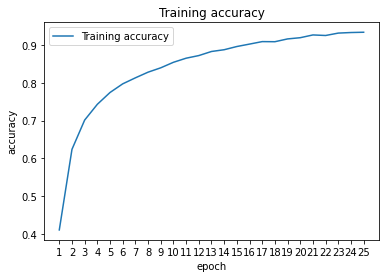

In [ ]:
# accuracy values are stored in the dictionary `History.history`
# the dictonary key to access these accuracy values are:
# "acc" in tensorflow versions <2
# "accuracy" in later versions

# check the current version
if int(tf.__version__.split('.')[0]) > 1:
    acc_key = 'accuracy'
else:
    acc_key = 'acc'

#-----------------------------------------------------------
# Retrieve a list of list results on training and validation data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[acc_key]
loss     = history.history['loss']
epochs   = range(1,len(acc)+1) # Get number of epochs
#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc,  label='Training accuracy')
plt.title('Training accuracy')
plt.xticks(epochs)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend();

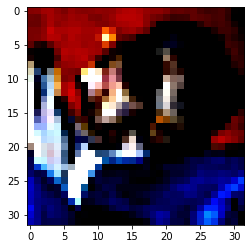

In [ ]:
# Visualizing the activation maps of  convolutional layers
plt.imshow(X_test[0], cmap='gray')
plt.show()

In [ ]:
!jupyter nbconvert --to pdf notebook.ipynb --output-dir='/freddiesethi/desktop'

[NbConvertApp] WARNING | pattern 'notebook.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Ex

In [ ]:
!jupyter nbconvert --to pdf notebook.ipynb


[NbConvertApp] WARNING | pattern 'notebook.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Ex